In [170]:
import pandas as pd

ts="1714851585519"
df = pd.read_json(f'../neural_networks/perceptron/logs/executions/wine/output-{ts}.json')
df_predictions = pd.read_csv(f'../neural_networks/perceptron/logs/predictions/wine/predictions-{ts}.csv')

In [171]:
df

,epoch,weights,accuracy_validation,mse_training,accuracy_training,mse_validation,bias
0,999,"[[-0.021740434348429, -0.007497147582448, -0.0...",0.773585,0.432,0.784,0.452830,3.016295e-20
1,998,"[[-0.021728950604752002, -0.007492608670117000...",0.773585,0.432,0.784,0.452830,3.084046e-20
2,997,"[[-0.021717462558746, -0.0074880669104590005, ...",0.773585,0.432,0.784,0.452830,3.212555e-20
3,996,"[[-0.021705970203779002, -0.007483522301041000...",0.773585,0.432,0.784,0.452830,3.092422e-20
4,995,"[[-0.021694473533195, -0.007478974839424001, -...",0.773585,0.432,0.784,0.452830,3.111053e-20
...,...,...,...,...,...,...,...
995,4,"[[-0.0004351204767974018, 0.000567818441100708...",0.358491,1.312,0.344,1.283019,4.093947e-21
996,3,"[[-0.0002826355520467547, 0.000610361869888410...",0.358491,1.312,0.344,1.283019,4.291706e-21
997,2,"[[-0.0001230505196583131, 0.000654668951758487...",0.339623,1.328,0.336,1.320755,4.111295e-21
998,1,"[[4.432078759077494e-05, 0.0007009096180130952...",0.339623,1.344,0.328,1.320755,4.267420e-21


<Axes: xlabel='epoch'>

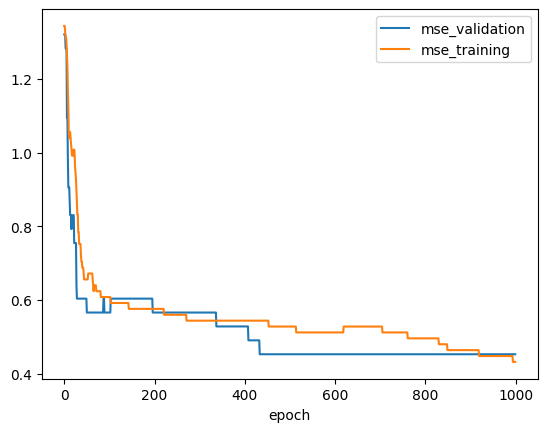

In [172]:
# Plot a line graph comparing mse_validation, mse_test and mse_train for each epoch called iteration of 1000 first rows
df.plot(x='epoch', y=['mse_validation', 'mse_training'])

<Axes: xlabel='epoch'>

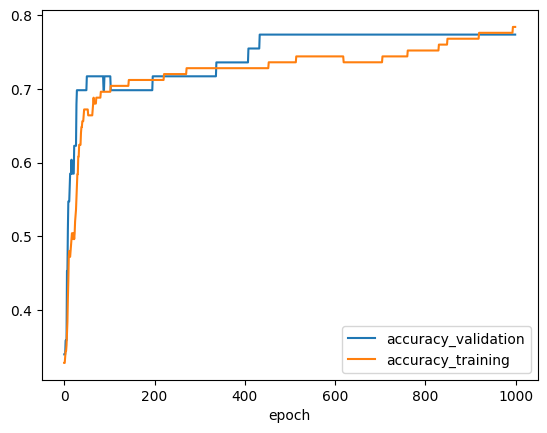

In [173]:
# Plot a line graph comparing accuracy_validation, accuracy_test and accuracy_train for each epoch called iteration
# plot smoothed mean accuracy for each epoch - 7 epochs
df.plot(
    x='epoch', 
    y=['accuracy_validation', 'accuracy_training']
)
        


In [174]:
df_predictions.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,expected,predicted
0,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.6,0.58,1.55,640.0,3,3
1,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.9,0.58,1.33,415.0,3,3
2,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.6,1.15,2.90,1320.0,1,1
3,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.8,0.92,3.22,1195.0,1,1
4,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.7,0.66,1.36,560.0,3,3


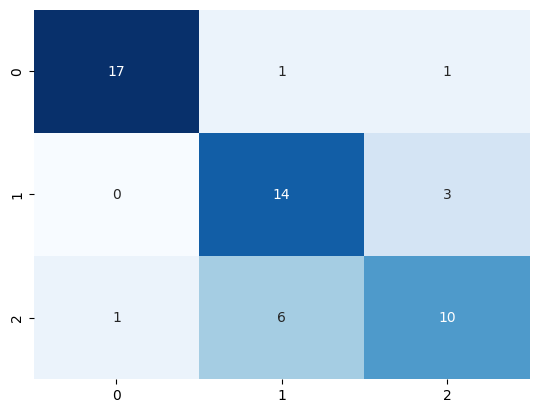

In [177]:
# Plot matrix of confusion with legend
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(
    df_predictions['expected'], 
    df_predictions['predicted'], 
)

sns.matrix = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [178]:
df_predictions.where(df_predictions['expected'] != df_predictions['predicted']).dropna()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,expected,predicted
6,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.950,3.38,795.0,3.0,1.0
15,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.700,2.47,780.0,1.0,3.0
18,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.360,3.21,562.0,3.0,2.0
19,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750.0,3.0,2.0
20,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.840,2.01,515.0,3.0,2.0
21,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.000,2.75,680.0,3.0,2.0
31,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.590,1.30,500.0,2.0,3.0
37,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.960,2.06,495.0,3.0,2.0
42,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.740,1.42,530.0,2.0,3.0
44,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.760,1.29,630.0,2.0,3.0


In [179]:
df.iloc[0]

epoch                                                                999
weights                [[-0.021740434348429, -0.007497147582448, -0.0...
accuracy_validation                                             0.773585
mse_training                                                       0.432
accuracy_training                                                  0.784
mse_validation                                                   0.45283
bias                                                                 0.0
Name: 0, dtype: object

In [180]:
df.iloc[0]['weights']

[[-0.021740434348429,
  -0.007497147582448,
  -0.002856209419953,
  -0.073038557692109,
  -0.05206082210080901,
  0.0029948802529230004,
  0.011264194876019,
  -0.0018481375426590001,
  0.0017715315990820002,
  -0.021059671979595,
  9.649422561069019e-05,
  0.00492267839488,
  0.010008767118046],
 [0.015546028060539,
  -0.019136784929546003,
  0.001251565148123,
  0.037459842303036006,
  0.044759077640581006,
  0.013491135306923,
  0.021193469626323003,
  0.00014632171788415852,
  0.010314946840079001,
  -0.057707172858511006,
  0.008884698705666001,
  0.020948230943178003,
  -0.006974844731302001],
 [0.008126200208087,
  0.027875667143339004,
  0.0028690844406420004,
  0.037068207062575,
  0.009093506075184,
  -0.014913756181494,
  -0.030746124107482002,
  0.0029265965936510004,
  -0.010754993358902001,
  0.080423999476864,
  -0.007419219397658001,
  -0.024225253176416002,
  -0.001258143277438]]

In [182]:
df.iloc[-1]['weights']

[[0.000220224964122998,
  0.0007492688870981276,
  0.00013354001236318502,
  0.0002716058236820896,
  -0.001216756517205,
  0.000797415144726928,
  0.0003117790315961718,
  0.00020439106184507382,
  0.0006887563020126854,
  0.0005610141019042807,
  0.0007948534128737838,
  6.563802212046877e-05,
  0.0017395031586190002],
 [0.0006798283364620448,
  0.00011929560245830651,
  0.0006119884158173563,
  0.0006556766692966289,
  0.001859005218531,
  0.0006669094746324532,
  0.0006065625091197583,
  0.00041924018457230176,
  0.0005311421619471318,
  0.0005545856107642968,
  0.00036041719931377125,
  0.0006499510696494555,
  -0.0005525572468797433],
 [0.0010317406196120001,
  0.0003731701417871858,
  0.0005189117406316017,
  0.0005622091805230399,
  0.001149512913632,
  0.0001079347589932147,
  0.0007931988541454916,
  0.0006011495224590108,
  0.0001115866162997081,
  0.0005415549260852277,
  0.00040670292143105504,
  0.0009300670698728443,
  0.0005888331975658904]]

In [183]:
df.iloc[0]['bias']

3.016294997787669e-20

In [184]:
df.iloc[-1]['bias']

2.345346139520643e-21